In [1]:
import numpy as np
import pandas as pd
import panel as pn
import datashader as ds
from numba import jit
from datashader import transfer_functions as tf

In [2]:
# De Jong Attractor
@jit(nopython=True)
def Attractor_Calc(x0, y0, n, a, b, c, d):
    
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    
    for i in np.arange(n-1):

        x[i+1] = np.sin(a * y[i]) - np.cos(b * x[i])
        y[i+1] = np.sin(c * x[i]) - np.cos(d * y[i])
    
    return x, y

In [3]:
def Attractor_Plot(n=10000000, a=-2.0, b=-2.0, c=-1.2, d=2.0, cmap=["yellowgreen", "yellow"]):

    x0, y0 =0.0, 0.0
    cvs = ds.Canvas(plot_width=700, plot_height=700)
    
    x, y = Attractor_Calc(x0, y0, n, a, b, c, d)
    agg = cvs.points(pd.DataFrame({"x":x, "y":y}), "x", "y")
    
    return tf.shade(agg, cmap)

Column
    [0] Column
        [0] IntSlider(end=10000000, name='n', start=1, value=10000000)
        [1] FloatSlider(end=2.0, name='a', start=-6.0, value=-2.0)
        [2] FloatSlider(end=2.0, name='b', start=-6.0, value=-2.0)
        [3] FloatSlider(end=1.2, name='c', start=-3.5999999999999996, value=-1.2)
        [4] FloatSlider(end=6.0, name='d', start=-2.0, value=2.0)
    [1] Row
        [0] PNG(Image, name='interactive00006')
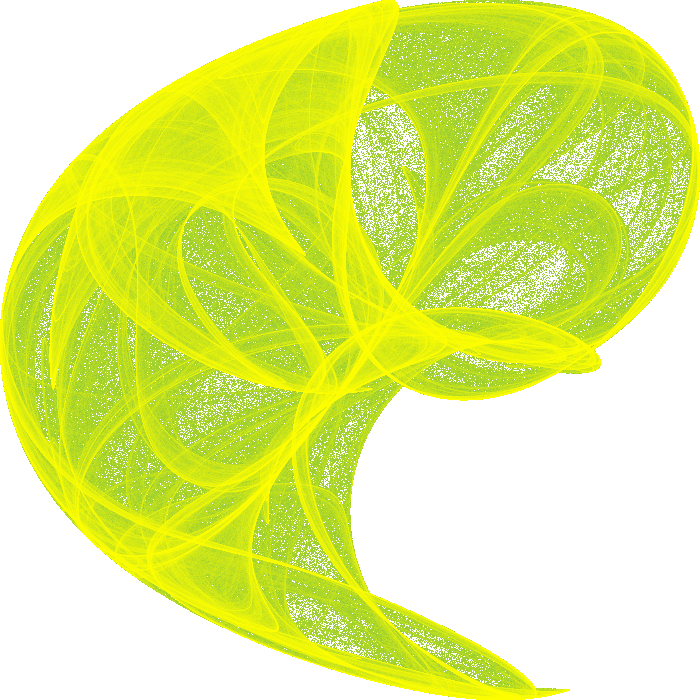

In [4]:
pn.extension()
pn.interact(Attractor_Plot, n=(1, 10000000))